# IMAGE COMPRESSION USING K-MEANS ALGORITHM

K-Means is a commertially important unsupervised Learning Algorithm used for grouping/clustering similar data points together. 

It is used in various Anomaly Detection,Market Analysis, customer segmentation.

In this project, we will use K-means for image compression.

## K-MEANS PROCEDURE

* Concretely, We will be given a training set  {𝑥(1),...,𝑥(𝑚)}, and we want to group the data into a few cohesive “clusters”, and then analyse it, or perform operations on it.

K-means is an iterative procedure that:
* Starts by guessing the initial centroids, and then
* Refines this guess by
     * Repeatedly assigning examples to their closest centroids, and then
     * Recomputing the centroids based on the assignments.

In [29]:
#Importing required libraries
import numpy as np;
import matplotlib.pyplot as plt;
from helper_function import *
%matplotlib inline



### Implementing K-Means- STEP 1
We create a function find_closest_centroids:
* It takes the data matrix X and location of centroids as two inputs.
* It outputs the index of centroid assigned to each data point in the form of a 1D numpy array.

Specifically, for every example $x^{(i)}$ we set
$$c^{(i)} := j \quad \mathrm{that \; minimizes} \quad ||x^{(i)} - \mu_j||^2,$$

In [15]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): (K, n) centroids
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """
    # Set K
    K = centroids.shape[0]

    idx = np.zeros(X.shape[0], dtype=int)
    m=X.shape[0]
    for i in range(m):
        min_distance=[]
        for j in range(K):
            dis=abs(np.linalg.norm(X[i] - centroids[j]))
            min_distance.append(dis)
        idx[i]=np.argmin(min_distance)
        
    return idx


### STEP 2- REASSIGNING CENTROIDS
Please complete the `compute_centroids` below to recompute the value for each centroid

* Specifically, for every centroid $\mu_k$ we set
$$\mu_k = \frac{1}{|C_k|} \sum_{i \in C_k} x^{(i)}$$ 

    where 
    *  C_k is the set of examples that are assigned to centroid k
    *  |C_k| is the number of examples in the set C_k


* Concretely, if two examples say $x^{(3)}$ and $x^{(5)}$ are assigned to centroid $k=2$,
then you should update $\mu_2 = \frac{1}{2}(x^{(3)}+x^{(5)})$.

In [16]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    
    m, n = X.shape
    
    centroids = np.zeros((K, n))
    
    for i in range(K):
        points=X[idx==i]
        centroids[i]=np.mean(points,axis=0)
    
    return centroids

### STEP 3 - FINDING BEST COORDINATES OF CENTROIDS BY LOOPING 
    
* In this step, we Update the centroids by looping, updating the centroids for a number of iterations.

In [31]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


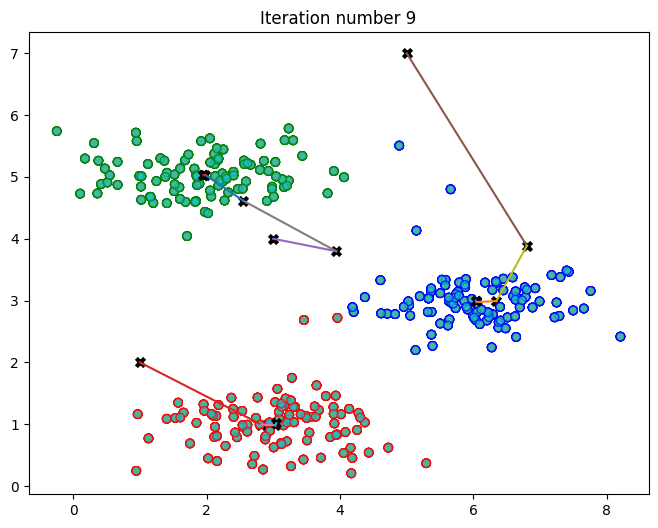

[[3.04367119 1.01541041]
 [1.95399466 5.02557006]
 [6.03366736 3.00052511]]


In [41]:
#Testing on a random data
X = np.load("data/ex7_X.npy")
num_iterations=10
initial_centroids=np.array([[1,2],[3,4],[5,7]])
centroids,idx=run_kMeans(X,initial_centroids=initial_centroids,max_iters=num_iterations,plot_progress=True)
print(centroids)


### Random Initialization
* Sometimes, while manually choosing the initial K centroids, we might points far away from the dataset, causing no data points being assigned to that centroid, and hence our algorithm output may suffer.
* Hence we randomly select K points from our dataset as our initial centroids.


In [35]:
def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


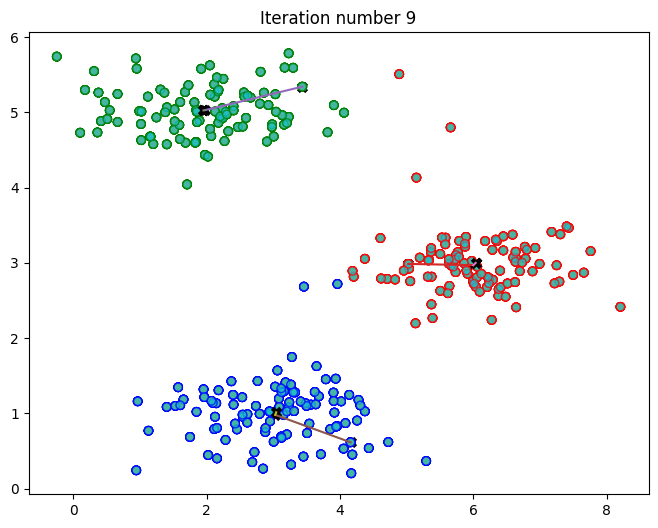

[[6.03366736 3.00052511]
 [1.95399466 5.02557006]
 [3.04367119 1.01541041]]


In [40]:
# Test again
k=3
centroids=kMeans_init_centroids(X,k)
centroids,idx=run_kMeans(X,centroids,10,True)
print(centroids)

### Image Compression using K Means
* A 24-bit color representation of an image has three 8-bit unsigned integer values of each pixel, that specify the red, blue and green values.
* An image has thousand of colors, we will reduce it to only 16 using K-Means Algorithm

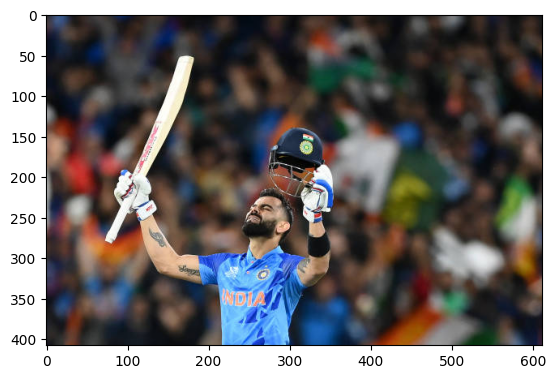

In [42]:
#Load the original Image, each pixel of this image is a data point
original_img=plt.imread('vk.png')
plt.imshow(original_img)

In [44]:
print(original_img.shape) #Shape of the input dataset
print(original_img) #Data set

(408, 612, 3)
[[[0.1764706  0.17254902 0.15294118]
  [0.17254902 0.17254902 0.16470589]
  [0.16862746 0.17254902 0.18039216]
  ...
  [0.09019608 0.09019608 0.09803922]
  [0.08627451 0.08627451 0.09411765]
  [0.08235294 0.08235294 0.09019608]]

 [[0.18431373 0.18039216 0.16078432]
  [0.18039216 0.18039216 0.17254902]
  [0.1764706  0.18039216 0.1882353 ]
  ...
  [0.09411765 0.09411765 0.10196079]
  [0.08627451 0.08627451 0.09411765]
  [0.08235294 0.08235294 0.09019608]]

 [[0.2        0.19607843 0.1764706 ]
  [0.19607843 0.19215687 0.18431373]
  [0.19215687 0.19215687 0.2       ]
  ...
  [0.09411765 0.09411765 0.10196079]
  [0.09019608 0.09019608 0.09803922]
  [0.08627451 0.08627451 0.09411765]]

 ...

 [[0.09411765 0.08627451 0.13725491]
  [0.09803922 0.09019608 0.13333334]
  [0.10196079 0.09411765 0.13725491]
  ...
  [0.20392157 0.1254902  0.22352941]
  [0.20784314 0.12941177 0.22745098]
  [0.21568628 0.14117648 0.22745098]]

 [[0.09019608 0.08235294 0.13333334]
  [0.09411765 0.0862745

In [45]:
'''The original image is a 3D matrix, containing the pixel position in the first
 two indices, and the color intensity in the third index.
   We have to transform it to a 2D matrix in order to apply the algorithm'''
X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))
print(X_img)


[[0.1764706  0.17254902 0.15294118]
 [0.17254902 0.17254902 0.16470589]
 [0.16862746 0.17254902 0.18039216]
 ...
 [0.20784314 0.12941177 0.22745098]
 [0.21176471 0.13333334 0.23137255]
 [0.21960784 0.14509805 0.23137255]]


In [46]:
# Applying the Algorithm
K=16
max_iter=10
initial_centroids=kMeans_init_centroids(X_img,K)
centroids,idx=run_kMeans(X_img,initial_centroids=initial_centroids,max_iters=max_iter)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 800x600 with 0 Axes>

In [48]:
print(idx.shape)
print(idx[:5])



(249696,)
[10 10 10 10 10]


In [49]:
idx=find_closest_centroids(X_img,centroids=centroids)
print(idx[:5])


[10 10 10 10 10]


In [50]:
X_recovered = centroids[idx, :] 

# Reshape image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape) 

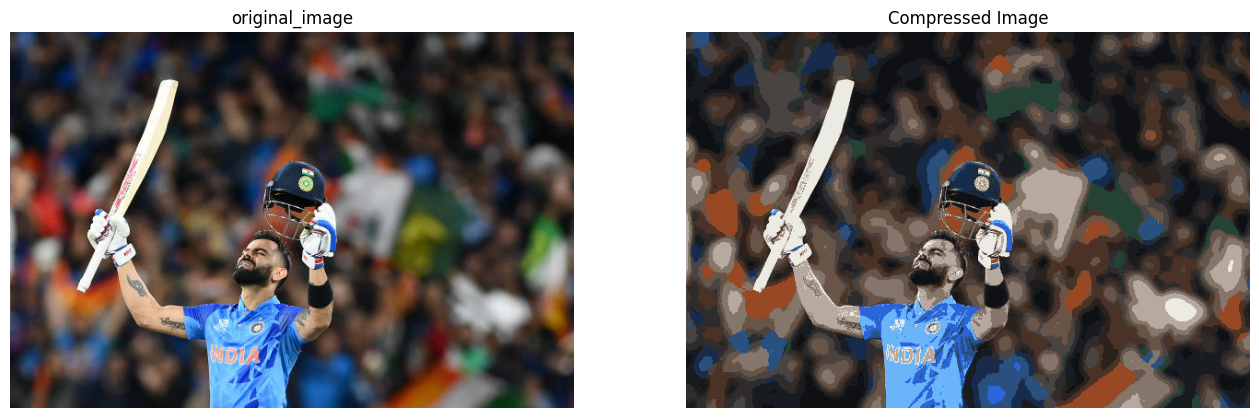

In [52]:
fig,ax=plt.subplots(1,2,figsize=(16,16))
plt.axis('off')
ax[0].imshow(original_img)
ax[0].axis('off')
ax[0].set_title('original_image')

ax[1].imshow(X_recovered)
ax[1].axis('off')
ax[1].set_title('Compressed Image')
plt.show()